# Titanic Survival Prediction

* * *
By Kongsakun Panyang

Email : Kongsakun@kkumail.com

Follow to kaggle project : https://www.kaggle.com/c/titanic

My kaggle profile : https://www.kaggle.com/kongsakunpanyang

My LinkedIn profile : https://www.linkedin.com/in/kongsakun-panyang-b35029230/

My upwork profile : https://www.upwork.com/freelancers/~01ab6f69eacc2cd33a
* * *

Data Science Pathway (According to Data Science Foundation: Fundamentals course in LinkedIn Learning)

Planning
1. Define Goals : Predicts survival passengers in Titanic
2. Organize Resource
3. Coordinate people
4. Schedule Project

Wrangling/Preparation
1. Get data : from kaggle (https://www.kaggle.com/competitions/titanic)
2. Clean data : Making data easy for use
3. Explore data : Data visualization
4. Refine data : Clean and shape it

Modeling
1. Create model
2. Validate model
3. Evaluate model
4. Refine model

Applying
1. Present model
2. Deploy model
3. Revisit model
4. Archive assets
* * * *

# Contents

1. Import Library & Files
2. Data analysis
3. Cleaning Data
4. Modeling
5. Present a model
* * *

Import Library
-----

In [259]:
import numpy as np # for linear algebra and operation
import pandas as pd # for dataframe
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
%matplotlib inline 

This project has 3 files

train, test, gender_submission

#### Import files

In [260]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [261]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [262]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


For survival : 0 = No, 1 = Yes

pclass = Ticket class : 1 = 1st, 2 = 2nd, 3 = 3rd

sibsp = of siblings / spouses aboard the Titanic

parch = of parents / children aboard the Titanic

embarked = Port of Embarkation : C = Cherbourg, Q = Queenstown, S = Southampton

Data analysis
-----

In [263]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Numerical : Age, Sibsp, Parch, Fare

Characterist : Survives, Pclass, Sex, Embarked

Alphabet-Numerical : Ticket, Cabin

In [264]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Data Visualization

Before visualization, try to assumpt what are factors that affect to survival chance.

Sex : According to survival passengers, males let females escape away from a ship before them

Class : Sound fascinating!

Age : Are children escape before adult?

* * *

Survival by sex

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

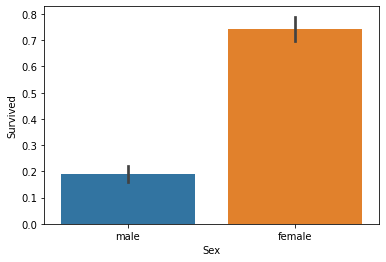

In [265]:
sns.barplot(x='Sex', y='Survived', data=train)

In [266]:
train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

Survival Female = 0.742038

Unservival Female = 0.257962

In [267]:
train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

Survival Male = 0.188908

Unservival Male = 0.811092

**Conclution, Females are more likely survive than males** 

Survival by Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

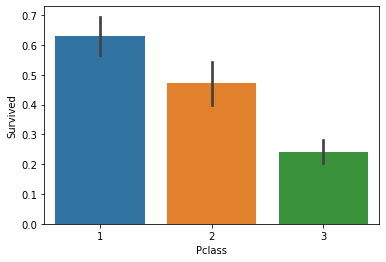

In [268]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [269]:
train['Survived'][train['Pclass'] == 1].value_counts(normalize = True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

For 1st class passenger

Survived = 0.62963

Unservived = 0.37037

In [270]:
train['Survived'][train['Pclass'] == 2].value_counts(normalize = True)

0    0.527174
1    0.472826
Name: Survived, dtype: float64

For 2nd class passenger

Survived = 0.472826

Unservived = 0.527174

In [271]:
train['Survived'][train['Pclass'] == 3].value_counts(normalize = True)

0    0.757637
1    0.242363
Name: Survived, dtype: float64

For 3nd class passenger

Survived = 0.242363

Unservived = 0.757637

**Conclusion, the passengers who have high potential ticket are more likely survive than lower them**

Survival by age

Firstly, we need to fill NaN to 'Age' column because they have 177 null data 

So we need to fill both train and test data

In [272]:
train['Age'] = train['Age'].fillna(-0.5)
test['Age']= test['Age'].fillna(-0.5)

I fill -0.5 for 'Age' null data because we don't know how old are them, when we plot a graph we can label as 'Unknown'

Next, label age groups

In fact, we have many age categories because every year we have new research about age categories

Thus, I would like to classified 4 group.

Child (0-12 years), Adolescence (13-18 years), Adult (19-59 years) and Senior Adult (60 years and above)

In [273]:
secs = [-1, 0, 13, 19, 60, np.inf]
label = ['Unknown', 'Child', 'Adolescence', 'Adult', 'Senior Adult']

Create new column 'Age group'

In [274]:
train['Age group'] = pd.cut(train['Age'], secs, labels = label)
test['Age group'] = pd.cut(test['Age'], secs, labels = label)

Try visualizing

<AxesSubplot:xlabel='Age group', ylabel='Survived'>

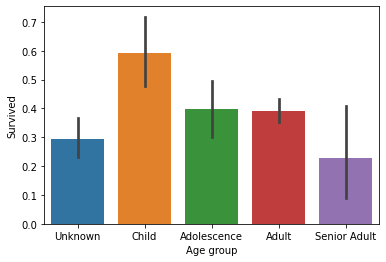

In [275]:
sns.barplot(x="Age group", y="Survived", data=train)

I don't focus on unknown


In [276]:
train['Survived'][train['Age group'] == 'Child'].value_counts(normalize = True)

1    0.591549
0    0.408451
Name: Survived, dtype: float64

For Children

Survived = 0.591549

Unservived = 0.408451

In [277]:
train['Survived'][train['Age group'] == 'Adolescence'].value_counts(normalize = True)

0    0.602151
1    0.397849
Name: Survived, dtype: float64

For Adolescence

Survived = 0.397849

Unservived = 0.602151

In [278]:
train['Survived'][train['Age group'] == 'Adult'].value_counts(normalize = True)

0    0.609848
1    0.390152
Name: Survived, dtype: float64

For Adult

Survived = 0.390152

Unservived = 0.609848

In [279]:
train['Survived'][train['Age group'] == 'Senior Adult'].value_counts(normalize = True)

0    0.772727
1    0.227273
Name: Survived, dtype: float64

For Senior Adult

Survived = 0.227273

Unservived = 0.772727

**Conclusion, the passengers who have lower age are more likely survive**

## Cleaning Data

My goal is refine to int. data all of them

Check our test data

In [280]:
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,5
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,260
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


- Number of passengers are 418
- count on 'Fare' is 417 (It means 'Fare' has a missing data)
- 'Cabin' only has 91 

Drop datas which I think it is not necessary

In [281]:
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Cabin'], axis = 1)

test = test.drop(['Ticket'], axis = 1)
train = train.drop(['Ticket'], axis = 1)

Combine train + test

In [282]:
combine = [train, test]

Extract the title of names 

In [283]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Try visualizing

<AxesSubplot:xlabel='Title', ylabel='Survived'>

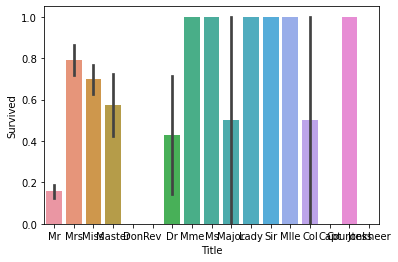

In [284]:
sns.barplot(x="Title", y="Survived", data=train)

Too many title, so we need to replace datas

'Rare' replace from 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'

'Royal' replace from 'Countess', 'Lady', 'Sir'

'Mlle' replace to 'Miss'

Ms replace to 'Miss'

Mme replace tp 'Mrs'





In [285]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']]

,Title,Survived
0,Mr,0
1,Mrs,1
2,Miss,1
3,Mrs,1
4,Mr,0
...,...,...
886,Rare,0
887,Miss,1
888,Miss,0
889,Mr,1


Check Title more

In [286]:
train[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.250000
Royal,1.000000


<AxesSubplot:xlabel='Title', ylabel='Survived'>

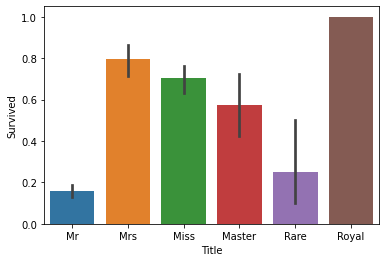

In [287]:
sns.barplot(x="Title", y="Survived", data=train)

Change 'Title' into numberical value, Follow to survived value

In [288]:
title_map = {
    'Mr' : 1,
    'Rare' : 2,
    'Master' : 3,
    'Miss' : 4,
    'Mrs' : 5,
    'Royal' : 6
}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.4583,Q,Unknown,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Adult,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Child,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Adult,5
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Adolescence,5


Change 'Age group' into numberical values

In [289]:
age_group = {
    'Unknown' : 0,
    'Child' : 1,
    'Adolescence' : 2,
    'Adult' : 3,
    'Senior Adult' : 4
}

for dataset in combine:
    dataset['Age group'] = dataset['Age group'].map(age_group)
    dataset['Age group'] = dataset['Age group'].fillna(0)

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.4583,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,3,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,1,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3,5
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,5


We would like to drop 'Age' because we already have 'Age group'

In [290]:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

We would like to drop 'Name'

In [291]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

Change 'Sex' into numberical value

In [292]:
sex_group = {
    'male' : 0,
    'female' : 1
}

train['Sex'] = train['Sex'].map(sex_group)
test['Sex'] = test['Sex'].map(sex_group)

train.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age group,Title
0,1,0,3,0,1,0,7.2500,S,3,1
1,2,1,1,1,1,0,71.2833,C,3,5
2,3,1,3,1,0,0,7.9250,S,3,4
3,4,1,1,1,1,0,53.1000,S,3,5
4,5,0,3,0,0,0,8.0500,S,3,1
5,6,0,3,0,0,0,8.4583,Q,0,1
6,7,0,1,0,0,0,51.8625,S,3,1
7,8,0,3,0,3,1,21.0750,S,1,3
8,9,1,3,1,0,2,11.1333,S,3,5
9,10,1,2,1,1,0,30.0708,C,2,5


Change 'Embarked' into numberical value

In [293]:
embarked_map = {
    'S' : 1,
    'C' : 2,
    'Q' : 3
}

train['Embarked'] = train['Embarked'].map(embarked_map)
test['Embarked'] = test['Embarked'].map(embarked_map)


train.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age group,Title
0,1,0,3,0,1,0,7.2500,1.0,3,1
1,2,1,1,1,1,0,71.2833,2.0,3,5
2,3,1,3,1,0,0,7.9250,1.0,3,4
3,4,1,1,1,1,0,53.1000,1.0,3,5
4,5,0,3,0,0,0,8.0500,1.0,3,1
5,6,0,3,0,0,0,8.4583,3.0,0,1
6,7,0,1,0,0,0,51.8625,1.0,3,1
7,8,0,3,0,3,1,21.0750,1.0,1,3
8,9,1,3,1,0,2,11.1333,1.0,3,5
9,10,1,2,1,1,0,30.0708,2.0,2,5


I would like to drop 'Fare' because we have 'Pclass'

In [294]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

train.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age group,Title
0,1,0,3,0,1,0,1.0,3,1
1,2,1,1,1,1,0,2.0,3,5
2,3,1,3,1,0,0,1.0,3,4
3,4,1,1,1,1,0,1.0,3,5
4,5,0,3,0,0,0,1.0,3,1
5,6,0,3,0,0,0,3.0,0,1
6,7,0,1,0,0,0,1.0,3,1
7,8,0,3,0,3,1,1.0,1,3
8,9,1,3,1,0,2,1.0,3,5
9,10,1,2,1,1,0,2.0,2,5


In [295]:
test.head(10)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age group,Title
0,892,3,0,0,0,3,3,1
1,893,3,1,1,0,1,3,5
2,894,2,0,0,0,3,4,1
3,895,3,0,0,0,1,3,1
4,896,3,1,1,1,1,3,5
5,897,3,0,0,0,1,2,1
6,898,3,1,0,0,3,3,4
7,899,2,0,1,1,1,3,1
8,900,3,1,0,0,2,2,5
9,901,3,0,2,0,1,3,1


Checking Before Modeling

In [296]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Embarked     889 non-null    float64 
 7   Age group    891 non-null    category
 8   Title        891 non-null    int64   
dtypes: category(1), float64(1), int64(7)
memory usage: 56.9 KB


In [297]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Embarked     418 non-null    int64   
 6   Age group    418 non-null    category
 7   Title        418 non-null    int64   
dtypes: category(1), int64(7)
memory usage: 23.6 KB


In train, 'Embarked' still has null data

In [298]:
train['Embarked'] = train['Embarked'].fillna(0)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

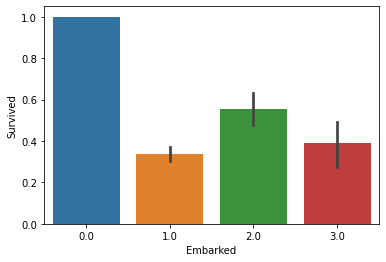

In [300]:
sns.barplot(x='Embarked', y='Survived', data=train)

## Modeling

### Choosing the best model

##### Splitting the training data
I would like to use 30% of the training data to test the accurency of differential models

In [301]:
from sklearn.model_selection import train_test_split

Don't forget to drop columns that is not important to choose

(Read what is train_test_split : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [302]:
predictors = train.drop(['Survived', 'PassengerId'], axis = 1)
target = train['Survived']

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.30)

#### Testing different models

I think this project relate to supervised learning (training data already labeled) for classifications

I need to try testing different models and checking which is best (Following to : https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article?source=frs_left_nav_clicked)
- Decision Tree Classification
- K-Nearest Neighbors
- Logistic Regression
- Naïve Bayes
- Random Forest Classification
- Support Vector Machines

Import accuracy score for choosing the best of models 

In [348]:
from sklearn.metrics import accuracy_score

##### Decision Tree Classification

In [360]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
prediction = decision_tree.predict(x_val)
accuracy_decision_tree = round(accuracy_score(prediction, y_val),3)

accuracy_decision_tree

0.847

##### K-Nearest Neighbors

In [350]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
prediction = kNN.predict(x_val)
accuracy_kNN = round(accuracy_score(prediction, y_val),3)

accuracy_kNN

0.806

##### Logistic Regression

In [351]:
from sklearn.linear_model import LogisticRegression

logistic_regress = LogisticRegression()
logistic_regress.fit(x_train, y_train)
prediction = logistic_regress.predict(x_val)
accuracy_logistic_regress = round(accuracy_score(prediction, y_val),3)

accuracy_logistic_regress

0.825

##### Naïve Bayes

In [366]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
prediction = naive_bayes.predict(x_val)
accuracy_naive_bayes = round(accuracy_score(prediction, y_val),3)

accuracy_naive_bayes

0.821

##### Random Forest Classification

In [367]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
prediction = RFC.predict(x_val)
accuracy_RFC = round(accuracy_score(prediction, y_val),3)

accuracy_RFC

0.832

##### Support Vector Machines
* * * * * *
Note!

Support Vector Machines have both classification and regression. Then, I need to focus only classification

In [381]:
from sklearn.svm import SVC

support_vector_machines = SVC()
support_vector_machines.fit(x_train, y_train)
prediction = support_vector_machines.predict(x_val)
accuracy_support_vector_machines = round(accuracy_score(prediction, y_val),3)

accuracy_support_vector_machines

0.854

Overview

In [377]:
ML_models = pd.DataFrame({
    'Model' : ['Decision Tree Classification', 
               'K-Nearest Neighbors', 
               'Logistic Regression', 
               'Naïve Bayes', 
               'Random Forest Classification', 
               'Support Vector Machines'],
    'Score' : [accuracy_decision_tree,
              accuracy_kNN,
              accuracy_logistic_regress,
              accuracy_naive_bayes,
              accuracy_RFC,
              accuracy_support_vector_machines]
})

ML_models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Support Vector Machines,0.854
0,Decision Tree Classification,0.847
4,Random Forest Classification,0.832
2,Logistic Regression,0.825
3,Naïve Bayes,0.821
1,K-Nearest Neighbors,0.806


Thus, I would like to use SVM for testing data

## Present a model

I would like to create a table that shows 'PassengerId' and 'Survived' 

In [387]:
Pid = test['PassengerId']
predictions = support_vector_machines.predict(test.drop(['PassengerId'], axis = 1)) 
#'PassengerId' is not important for prediction processing

output = pd.DataFrame({
    'PassengerID' : Pid,
    'Survived' : predictions
})

output

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


#### Create a output file

In [388]:
output.to_csv('submission.csv', index = False)

#### Compare to gender_submission file

In [389]:
gender_sub = pd.read_csv('gender_submission.csv')

from re import A
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(gender_sub['Survived'],output['Survived']))
print(classification_report(gender_sub['Survived'],output['Survived']))

[[250  16]
 [  7 145]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       266
           1       0.90      0.95      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.94      0.95       418



# Thank you :)

### Source
- https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner
- https://scikit-learn.org/
- https://www.simplilearn.com
- https://ieeexplore.ieee.org/document/6416855 (For age classification)
- https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/?fbclid=IwAR1HwADd1dTZ9uNej6-aW99mhzIjAUjgOoUWSPeL1tpe7w5duRKre8SaVE4